In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


# Importing Dataset #

In [2]:
data = pd.read_csv('../input/insurance/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
features = data.drop('charges', axis=1)
targets = data['charges']

# Logistic Regression #

Auto select categorical data using **make_column_selector**

In [5]:
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object) # Select string data types

numerical_columns = numerical_columns_selector(features)
categorical_columns = categorical_columns_selector(features)

In [6]:
numerical_columns

['age', 'bmi', 'children']

In [7]:
categorical_columns

['sex', 'smoker', 'region']

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [9]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=50))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('logisticregression', LogisticRegression(max_iter=50))])

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

encoded_targets = LabelEncoder().fit_transform(targets)
print(utils.multiclass.type_of_target(encoded_targets))

multiclass


In [12]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(features, encoded_targets, random_state=42)

In [13]:
model.fit(data_train, target_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('logisticregression', LogisticRegression(max_iter=50))])

In [14]:
data_test.head()

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest


In [15]:
model.predict(data_test)[:5]

array([ 905,  295, 1170,  809, 1216])

In [16]:
target_test[:5]

array([ 649,  380, 1173,  664, 1190])

In [17]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(model.predict(data_test), target_test))

227.96988541629005

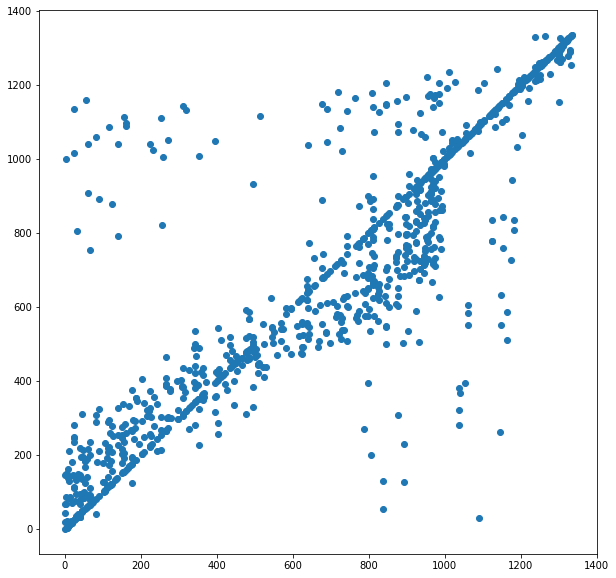

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(model.predict(data_train), target_train)
plt.show()

# K-Nearest-Neighbours #

In [19]:
features_encoded = pd.get_dummies(features)
data_train, data_test, target_train, target_test = train_test_split(features_encoded, targets, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn_model= KNeighborsRegressor().fit(data_train, target_train)

k= 1 RMSE value for 11739.181920953437
k= 2 RMSE value for 10589.282876951656
k= 3 RMSE value for 10267.186684858209
k= 4 RMSE value for 9957.416048620786
k= 5 RMSE value for 10219.359372844006
k= 6 RMSE value for 10337.563257785961
k= 7 RMSE value for 10391.365413003692
k= 8 RMSE value for 10497.09990312264
k= 9 RMSE value for 10521.843117311346
k= 10 RMSE value for 10528.428724084315


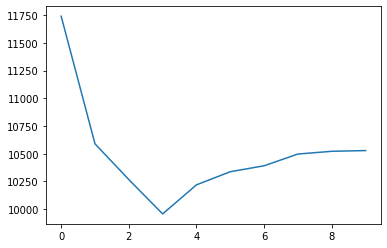

In [21]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model  = KNeighborsRegressor(n_neighbors= k).fit(data_train, target_train)
    predictions  = knn_model.predict(data_test)
    rmse=  np.sqrt(mean_squared_error(target_test,predictions))
    RMSE.append(rmse)
    print("k=", k, "RMSE value for",rmse)

plt.plot(RMSE)
plt.show()

k = 3 is optimal value

In [22]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
knn_params= {"n_neighbors":np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn,  knn_params, cv =10).fit(data_train, target_train)
knn_cv_model.best_params_

{'n_neighbors': 8}

In [23]:
#Final Model
knn_tuned  = KNeighborsRegressor(n_neighbors=3).fit(data_train, target_train)
predictions = knn_tuned.predict(data_test)
np.sqrt(mean_squared_error(target_test,predictions))

10267.186684858209

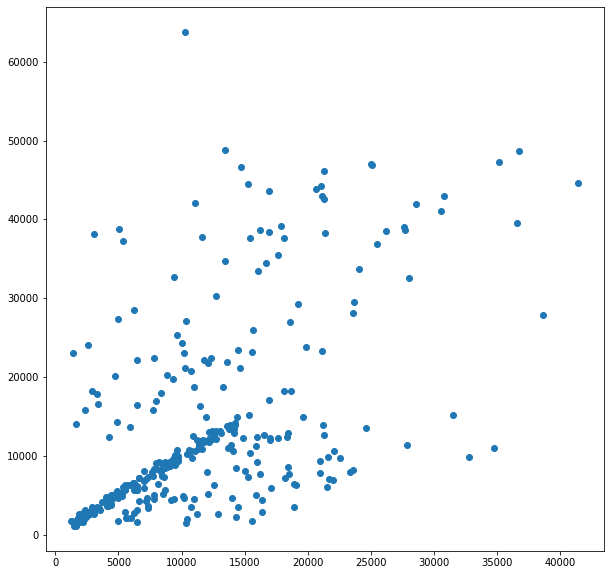

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(predictions, target_test)
plt.show()

# LightGBM #

In [25]:
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor().fit(data_train, target_train)
predictions   = lgb_model.predict(data_test)
np.sqrt(mean_squared_error(target_test,predictions))

4748.806640102819

# Conclusion #
So far Logistic Regression has the least RMSE making it the best choice